In [4]:
import kagglehub

# Descargar dataset
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'formula-1-world-championship-1950-2020' dataset.
Path to dataset files: /kaggle/input/formula-1-world-championship-1950-2020


In [6]:
import pandas as pd
import os

# Cargar un archivo del dataset (ejemplo: "races.csv")
df = pd.read_csv(os.path.join(path, "races.csv"))

# 1. Exploración inicial
print(df.head())      # Primeras filas
print(df.info())      # Estructura
print(df.describe())  # Estadísticas numéricas




   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N       \N       

In [8]:
# 2. Revisión estructural
print("Dimensiones:", df.shape)
print("Nombres de columnas:", df.columns)



Dimensiones: (1125, 18)
Nombres de columnas: Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [9]:
# 3. Identificación de valores nulos y duplicados
print("Valores nulos:\n", df.isnull().sum())
print("Duplicados:", df.duplicated().sum())



Valores nulos:
 raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64
Duplicados: 0


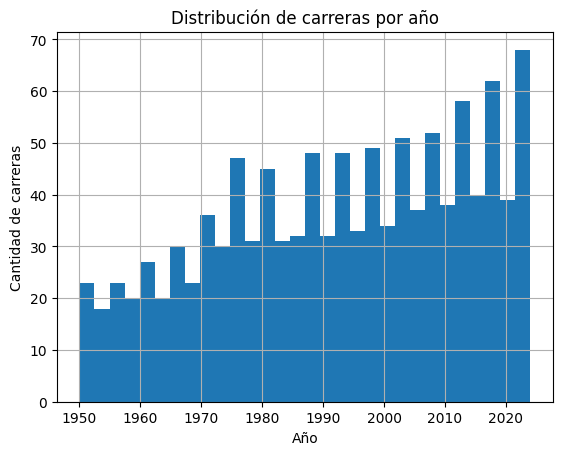

In [10]:
# 4. Análisis univariado (una variable a la vez)
import matplotlib.pyplot as plt
df['year'].hist(bins=30)
plt.title("Distribución de carreras por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de carreras")
plt.show()



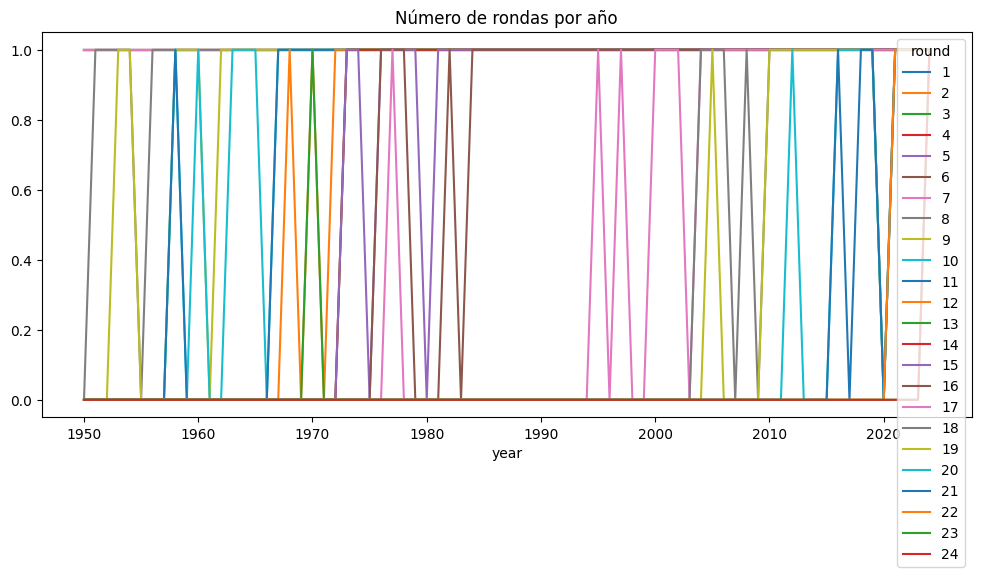

In [11]:
# 5. Análisis bivariado (relaciones entre variables)
pd.crosstab(df['year'], df['round']).plot(kind="line", figsize=(12,5))
plt.title("Número de rondas por año")
plt.show()



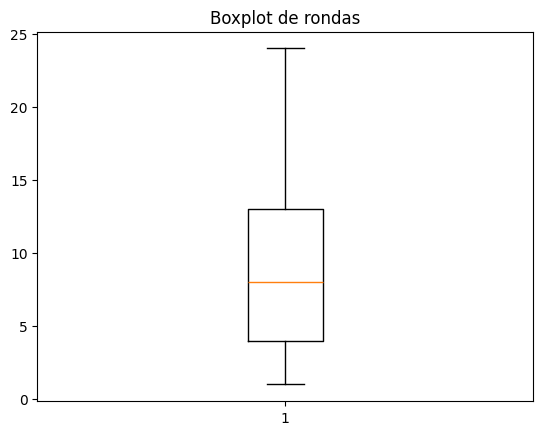

In [12]:
# 6. Detección de anomalías
plt.boxplot(df['round'])
plt.title("Boxplot de rondas")
plt.show()



In [13]:

# 7. Resumen
print("Hallazgos iniciales:")
print("- Distribución de carreras a lo largo de los años")
print("- Posibles valores atípicos en las rondas")
print("- Columnas con valores faltantes que requieren imputación")

Hallazgos iniciales:
- Distribución de carreras a lo largo de los años
- Posibles valores atípicos en las rondas
- Columnas con valores faltantes que requieren imputación


In [16]:
# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numeric_cols.corr()

# Display the correlation matrix
print("Matriz de correlación:")
display(corr)

Matriz de correlación:


,raceId,year,round,circuitId
raceId,1.000000,0.118964,0.067662,0.274308
year,0.118964,1.000000,0.350097,-0.176613
round,0.067662,0.350097,1.000000,0.130798
circuitId,0.274308,-0.176613,0.130798,1.000000


from matplotlib import pyplot as plt
corr['raceId'].plot(kind='hist', bins=20, title='raceId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['round'].plot(kind='hist', bins=20, title='round')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['circuitId'].plot(kind='hist', bins=20, title='circuitId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='raceId', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='year', y='round', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='round', y='circuitId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['raceId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corr.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('raceId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['round']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corr.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('round')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['circuitId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corr.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('circuitId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = corr.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
corr['raceId'].plot(kind='line', figsize=(8, 4), title='raceId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['round'].plot(kind='line', figsize=(8, 4), title='round')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['circuitId'].plot(kind='line', figsize=(8, 4), title='circuitId')
plt.gca().spines[['top', 'right']].set_visible(False)

             raceId      year     round  circuitId
raceId     1.000000  0.118964  0.067662   0.274308
year       0.118964  1.000000  0.350097  -0.176613
round      0.067662  0.350097  1.000000   0.130798
circuitId  0.274308 -0.176613  0.130798   1.000000


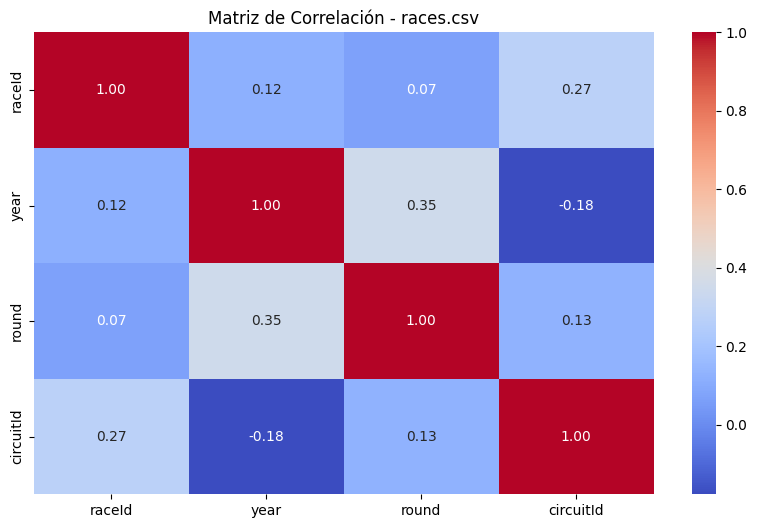

In [18]:
# Seleccionar solo columnas numéricas
num_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = num_df.corr()

# Mostrar como tabla
print(corr_matrix)

# Visualizar con mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - races.csv")
plt.show()